In [3]:
from sklearn import datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

def plot_decision_regions(X,y,classifier,test_idx = None, resolution = 0.02):
    
    # set up marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl,0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = f'Class {cl}',
                    edgecolor = 'black')
        
    #highlight test examples
    if test_idx:
        #plot all examples
        X_test,y_test = X[test_idx,:], y[test_idx]

        plt.scatter(X_test[:,0],X_test[:,1],
                    c = 'none', edgecolor = 'black', alpha = 1.0,
                     linewidth = 1, marker = 'o',
                      s=100, label =  'Test Set')


In [5]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class Labels :', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.3, random_state = 1, stratify=y
)

#scales features to mean = zero and stdev = 1
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

X_combined_sc = np.vstack((X_train_sc, X_test_sc))
y_combined = np.hstack((y_train,y_test))

Class Labels : [0 1 2]


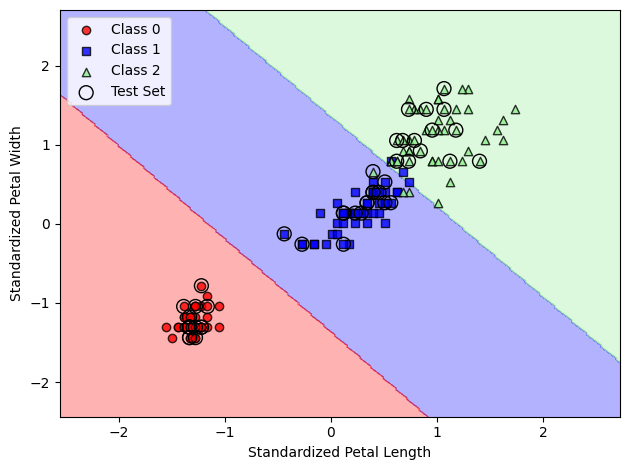

In [ ]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_sc,y_train)
plot_decision_regions(X_combined_sc,
                      y_combined,
                      classifier = svm,
                      test_idx = range(105,150)
                      )

plt.xlabel('Standardized Petal Length')
plt.ylabel('Standardized Petal Width')

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()


# Kernel Methods for linearly inseparable data

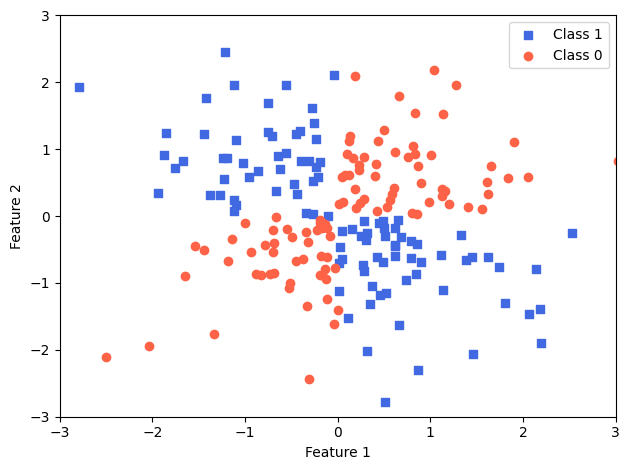

In [9]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:,1] > 0)

y_xor = np.where(y_xor,1,0)

plt.scatter(X_xor[y_xor == 1,0],
            X_xor[y_xor == 1,1],
            c = 'royalblue', marker = 's',
            label = 'Class 1')

plt.scatter(X_xor[y_xor == 0,0],
            X_xor[y_xor == 0,1],
            c = 'tomato', marker = 'o',
            label = 'Class 0')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

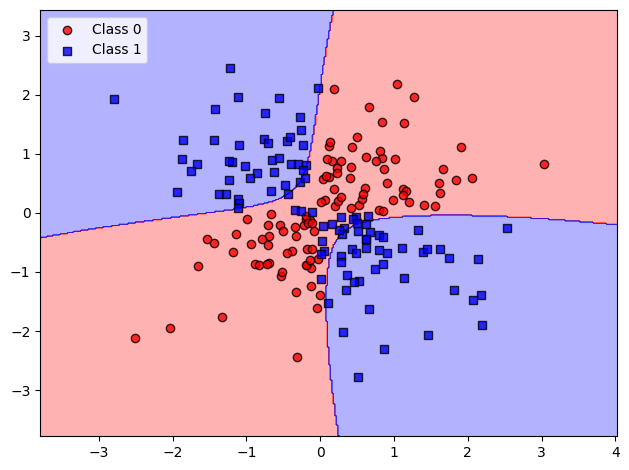

In [10]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.10, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor,y_xor, classifier= svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Examples with different Gamma Terms in RBF

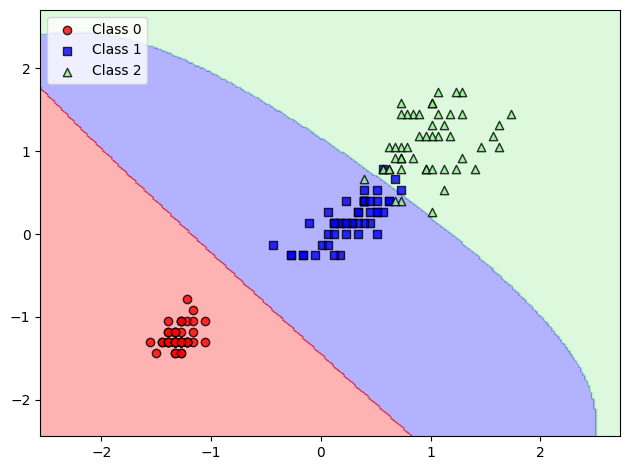

In [13]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.2, C = 1.0)
svm.fit(X_train_sc, y_train)
plot_decision_regions(X_combined_sc,y_combined, classifier= svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

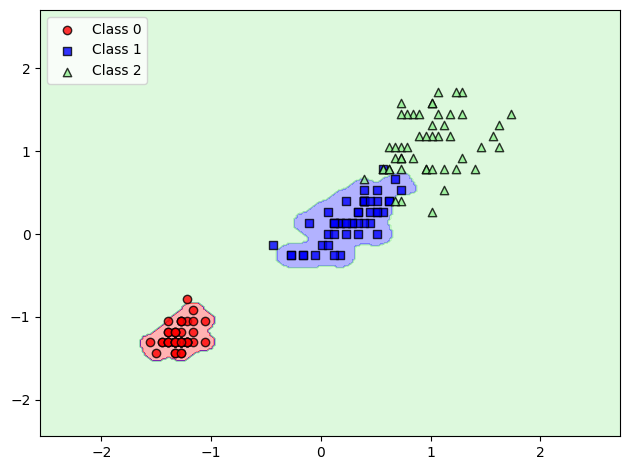

In [14]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 100, C = 1.0)
svm.fit(X_train_sc, y_train)
plot_decision_regions(X_combined_sc,y_combined, classifier= svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()